In [1]:
from scipy.io import wavfile
import pyworld as pw
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

WAV_FILE = 'C:\\Users\\TakaiYohei\\Desktop\\UtaHenkan\\input\\hibiki\\wavfile\\ponde.wav'

In [8]:
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

hparams = AttrDict(
    # Audio:
    num_mels=80,
    num_freq=1025,
    sample_rate=48000,
    frame_length_ms=50,
    frame_shift_ms=12.5,
    preemphasis=0.97,
    min_level_db=-100,
    ref_level_db=20,
)

In [2]:
def load_wav(path):
    w = librosa.core.load(path, sr=hparams.sample_rate)[0]
    w = librosa.effects.remix(w, intervals=librosa.effects.split(w))
#     w = librosa.effects.trim(w)[0]
    return w


def save_wav(wav, path):
    wav *= 32767 / max(0.01, np.max(np.abs(wav)))
    librosa.output.write_wav(path, wav, hparams.sample_rate)

In [20]:
w = load_wav(WAV_FILE)
#m1 = melspectrogram(w).astype(np.float32)
#s1 = _stft(w)
#f1 = collect_features(w, fs).T

[ 0.00183105 -0.0039978  -0.00183105 ... -0.0010376  -0.00218201
  0.00189209]


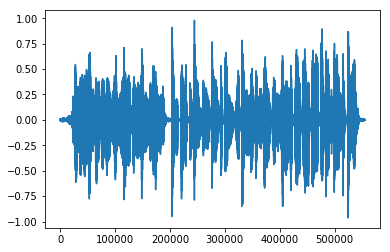

In [21]:
#fs, data = wavfile.read(WAV_FILE)
data = w
fs = hparams.sample_rate

data = data.astype(np.float) # WORLDはfloat前提のコードになっているのでfloat型にしておく
print(data)
plt.plot(data)
plt.show()

_f0, t = pw.dio(data, fs)  # 基本周波数の抽出
f0 = pw.stonemask(data, _f0, t, fs)  # 基本周波数の修正
sp = pw.cheaptrick(data, f0, t, fs)  # スペクトル包絡の抽出
ap = pw.d4c(data, f0, t, fs)  # 非周期性指標の抽出

[[1.85355864e-04 1.85387281e-04 1.85484509e-04 ... 3.76935809e-07
  3.78926004e-07 3.79567053e-07]
 [9.28597611e-05 9.27920994e-05 9.25928432e-05 ... 9.10147119e-08
  8.96823075e-08 8.92374288e-08]
 [5.77863278e-05 5.78398854e-05 5.80012067e-05 ... 9.64956804e-08
  9.50682264e-08 9.45977578e-08]
 ...
 [1.87312339e-06 1.94529229e-06 2.03885581e-06 ... 2.78527485e-08
  2.29941499e-08 2.18636195e-08]
 [4.64506223e-05 4.78940183e-05 4.88661088e-05 ... 1.61352004e-08
  8.31261412e-09 6.68141540e-09]
 [3.68891606e-04 3.77080733e-04 3.70674091e-04 ... 5.99014075e-09
  2.77371330e-09 2.12772695e-09]]


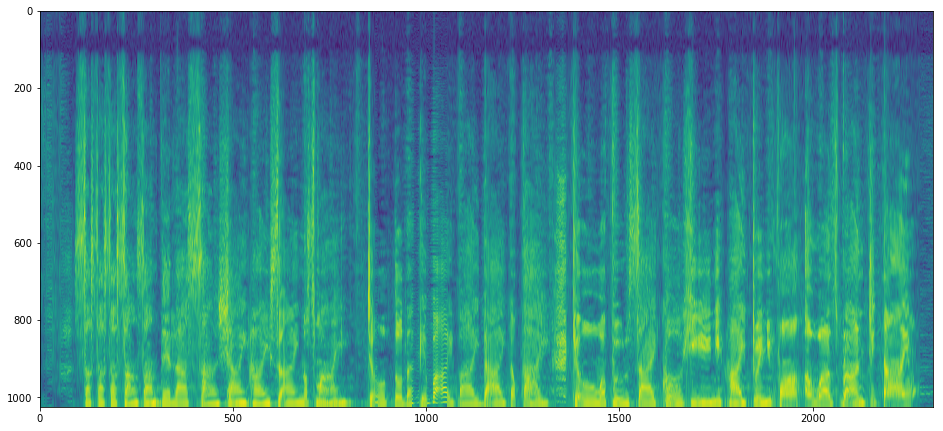

In [26]:
print(sp)
plt.figure(figsize=(16, 8))
plt.imshow(np.log(sp.T[::-1]))
plt.show()

In [23]:
synthesized = pw.synthesize(f0, sp, ap, fs)

In [24]:
print('original')
display.display(
    display.Audio(data, rate=fs)
)

print('synthesized')
display.display(
    display.Audio(synthesized, rate=fs)
)

original


synthesized
